In [109]:
# initialize packages
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [110]:
# Load data showing Daily total female births in California, 1959
# Data source: https://www.kaggle.com/datasets/dougcresswell/daily-total-female-births-in-california-1959
# related series was generated manually
df = pd.read_excel("data_2.xlsx")
df.drop('Unnamed: 0', axis=1, inplace=True)
print("Our data shape is: {}".format(df.shape))
df.head()

Our data shape is: (365, 3)


,Date,Births,y2
0,1959-01-01,35,26
1,1959-01-02,32,58
2,1959-01-03,30,36
3,1959-01-04,31,58
4,1959-01-05,44,63


In [111]:
# Some simple column editing
df.rename({'Date':'date', 'Births':'y'}, axis='columns', inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date'] = df['date'].dt.date 
df.head()

,date,y,y2
0,1959-01-01,35,26
1,1959-01-02,32,58
2,1959-01-03,30,36
3,1959-01-04,31,58
4,1959-01-05,44,63


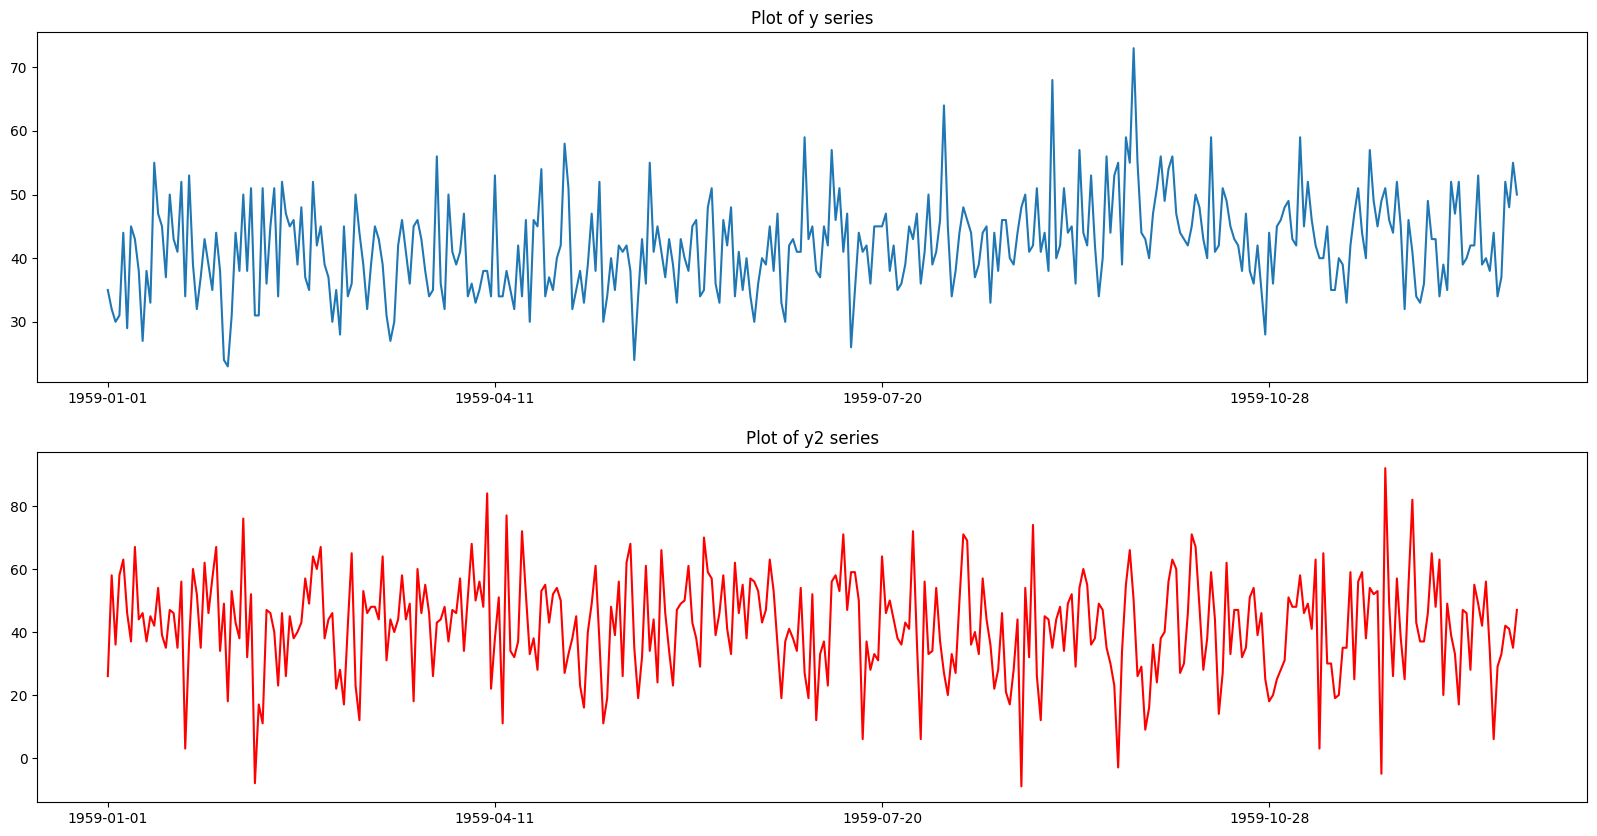

In [112]:
#plot data
# plots 
fig, axs = plt.subplots(2, 1, figsize=(20,10))

axs[0].plot(df.y)
axs[0].set_title("Plot of y series")
axs[0].set_xticks(np.arange(0,len(df.y),100))                                                       # display every 10-th tick
axs[0].set_xticklabels(df.date[np.arange(0,len(df.y),100)],rotation=0);


axs[1].plot(df.y2, color="red")
axs[1].set_title("Plot of y2 series")
axs[1].set_xticks(np.arange(0,len(df.y2),100))                                                       # display every 10-th tick
axs[1].set_xticklabels(df.date[np.arange(0,len(df.y2),100)],rotation=0);

We already know the y timeseries is non-stationary so we rendered it stationary. I will check if the new related timeseries -y2  is stationary or not.

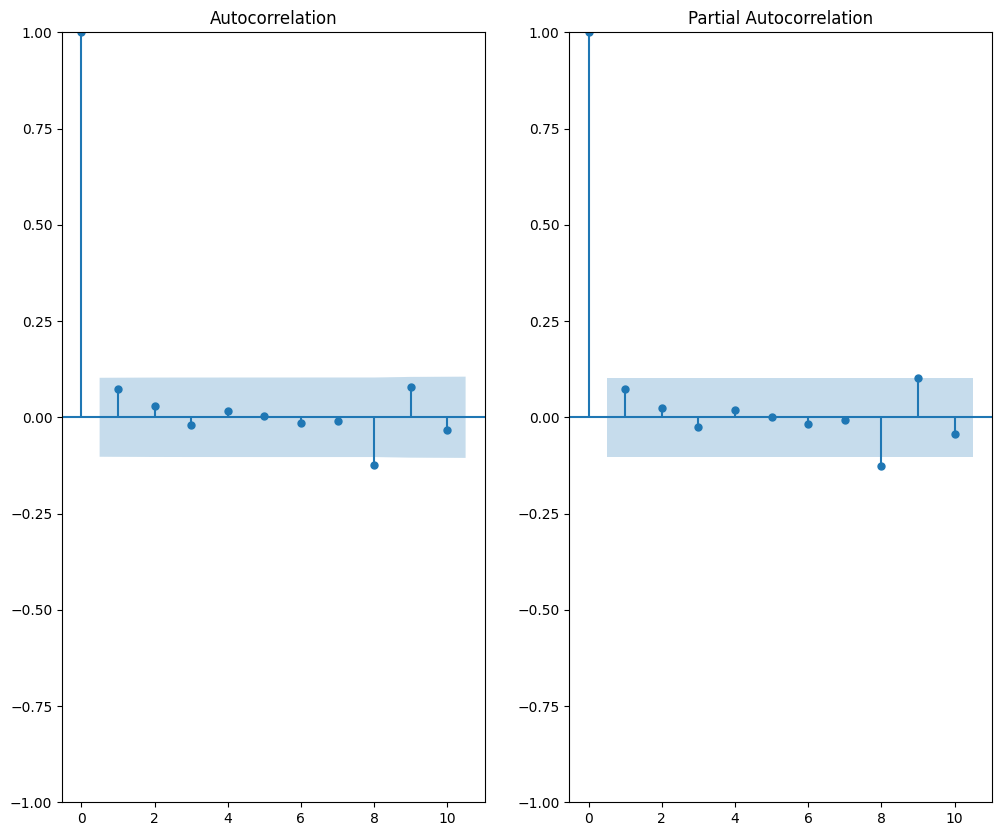

In [113]:
# Inspect AC and PAC functions. 
fig, axs = plt.subplots(1, 2,figsize=(12,10))
sm.graphics.tsa.plot_acf(df.y2, lags=10, ax=axs[0]);
sm.graphics.tsa.plot_pacf(df.y2, lags=10, ax=axs[1]);

# Both the acf and pacf decay exponentially. This suggests stationarity.

In [114]:
# Test the data for stationarity by using augmented Dickey-Fuller and Kwiatkowski-Phillips-Schmidt-Shin test.
# Augmented Dickey-Fuller (ADF) test

# Null hypothesis in ADF-test: the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure).
# Alternate hypothesis in ADF-test: the time series is stationary.

print("Results of Dickey-Fuller Test:")
res = sm.tsa.stattools.adfuller(df.y2, maxlag=5,regression='c',autolag='AIC')
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
print(f"#Lags Used:{res[2]}")
print(f"#Observations Used:{res[3]}")
print(f"#Critical value:{res[4]}")

print("\n-----------------------------------------------------------------------------------------------------------")
print("DECISION RULE: If p-value is < than desired significance level (5%) we reject the null hypothesis.\n")
if res[1] < 0.05:
    print("Since the p-value is less than the significance level (5%), we reject the null hypothesis that the timeseries is not stationary." +
          "\nConclusion The time series is stationary.")
else:
    print("Since the p-value is greater than the significance level (5%), we accept the null hypothesis that the timeseries is not stationary.")

Results of Dickey-Fuller Test:
Test Statistic:-17.704260793726537
p-value:3.525603515317972e-30
#Lags Used:0
#Observations Used:364
#Critical value:{'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}

-----------------------------------------------------------------------------------------------------------
DECISION RULE: If p-value is < than desired significance level (5%) we reject the null hypothesis.

Since the p-value is less than the significance level (5%), we reject the null hypothesis that the timeseries is not stationary.
Conclusion The time series is stationary.


In [115]:
# Kwiatkowski-Phillips-Schmidt-Shin(KPSS) test
# Null hypothesis in KPSS-test: the time series data is stationary.
# alternate hypothesis: the time series data is non-stationary.
print("Results of KPSS Test:")
res = sm.tsa.stattools.kpss(df.y2,regression='c',nlags='auto')
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
print(f"#truncation lags:{res[2]}")
print(f"#Critical value:{res[3]}")

print("\n-----------------------------------------------------------------------------------------------------------")
print("DECISION RULE: If p-value is < than desired significance level (5%) we reject the null hypothesis.\n")

if res[1] < 0.05:
    print("Since the p-value is less than the significance level (5%), we reject the null hypothesis that the timeseries is stationary." +
          "\nConclusion The time series is non-stationary.")
else:
    print("Since the p-value is greater than the significance level (5%), we accept the null hypothesis that the timeseries is stationary.")

Results of KPSS Test:
Test Statistic:0.238691998734523
p-value:0.1
#truncation lags:2
#Critical value:{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

-----------------------------------------------------------------------------------------------------------
DECISION RULE: If p-value is < than desired significance level (5%) we reject the null hypothesis.

Since the p-value is greater than the significance level (5%), we accept the null hypothesis that the timeseries is stationary.


In [116]:
# For caution sake, I will difference all the series
Y = np.asarray(df.y)
y = (100*(Y[1:Y.size]/Y[0:Y.size-1]-1))
# I removed heteroscedasticity in HWII so I will do it here as well
y = np.cbrt(y)

Y2 = np.asarray(df.y2)
y2 = (100*(Y2[1:Y2.size]/Y2[0:Y2.size-1]-1))
y2 = np.cbrt(y2)

diff_df = pd.DataFrame(data={"y":y, "y2":y2})
diff_df['date'] = df['date']
diff_df.head()

,y,y2,date
0,-2.046528,4.974226,1959-01-01
1,-1.842016,-3.359940,1959-01-02
2,1.493802,3.938886,1959-01-03
3,3.474246,2.050441,1959-01-04
4,-3.242497,-2.999412,1959-01-05


In [117]:
# Let's look at the correlation between "y" and "y2"
print(diff_df[["y", "y2"]].corr())

           y        y2
y   1.000000  0.055995
y2  0.055995  1.000000


In [118]:
# Estimate a VAR model
# Use first IC to gauge the number of lags
# For this reason we change the data into statsmodels calss 'VAR'  
Y = sm.tsa.VAR(diff_df[["y", "y2"]])

# estimate information criteria and print results (constant is included by default)
res = sm.tsa.VAR.select_order(Y,10)
res.summary()
# information criteria point to differents options: from 0-2 lags.

,AIC,BIC,FPE,HQIC
0,4.443,4.465,85.01,4.452
1,4.203,4.269,66.91,4.229
2,4.149,4.259*,63.39,4.193
3,4.131,4.284,62.25,4.192
4,4.109*,4.306,60.92*,4.188*
5,4.124,4.364,61.78,4.219
6,4.139,4.423,62.73,4.252
7,4.160,4.488,64.10,4.291
8,4.154,4.526,63.69,4.302
9,4.155,4.571,63.79,4.321


In [119]:
# Let's use 80% of the sample to estimate the model parameters and 1-step ahead forecasts.

# Save 20% of the sample to test the forecasts
n_fcs = np.round(0.2*diff_df.shape[0]).astype(int)

# empty place-holder for forecasts
fcs = np.empty((n_fcs,2,))
fcs[:] = np.nan

# declare "training" and "test" data
Y_train = sm.tsa.VAR(Y.y[0:-n_fcs,:])             # training data
Y_test  = Y.y[Y.y.shape[0]-n_fcs:Y.y.shape[0],:]  # test data

# declare evaluation measures matrices
rmse = np.empty((2,2,))
rmse[:] = np.nan


for p in range(1, 3):                                 # loop over models: p = [1,2]
    # fit VAR(p) on the training data
    mdl = Y_train.fit(p)                              # fit VAR(p)
    for i in range(0,n_fcs):                          # loop for 1-step-ahead forecasts on the last 20% of the data
        Y_test_i = Y.y[0:(Y.y.shape[0]-(n_fcs-i)),:]  # data for one-step-ahead forecast at forecast i
        fcs_i = mdl.forecast(y=Y_test_i, steps=1)     # produce one-step-ahead forecast
        fcs[i,:] = fcs_i                              # store the forecast
    
    # calculate rmse, rmspe, mae 
    rmse[p-1,0:2] = sm.tools.eval_measures.rmse(Y_test,fcs,0)

print("RMSE")
rmse  = pd.DataFrame(rmse,columns=['y','y2'], index=['p=1','p=2'])
print(rmse)

RMSE
            y        y2
p=1  2.179940  3.859412
p=2  2.130283  3.948090


In [120]:
# Perform rolling one-step-ahead forecast 
# Let's first move the date into index
Y = diff_df[["y", "y2"]]
n = Y.shape[0] 
for i in range(0,n_fcs):                          # loop for 1-step-ahead forecasts on the last 20% of the data
    
    var_i   = sm.tsa.VAR(Y[0:(n-(n_fcs-i))])      # declare var model object
    mdl_i   = var_i.fit(2)                        # fit var model
    fcs_i   = mdl_i.forecast(y=var_i.y, steps=1); # one-step-ahead forecast
    fcs[i,:] = fcs_i                              # store the forecast

Test RMSE: 2.1437173643326766


Text(0.5, 1.0, 'y2')

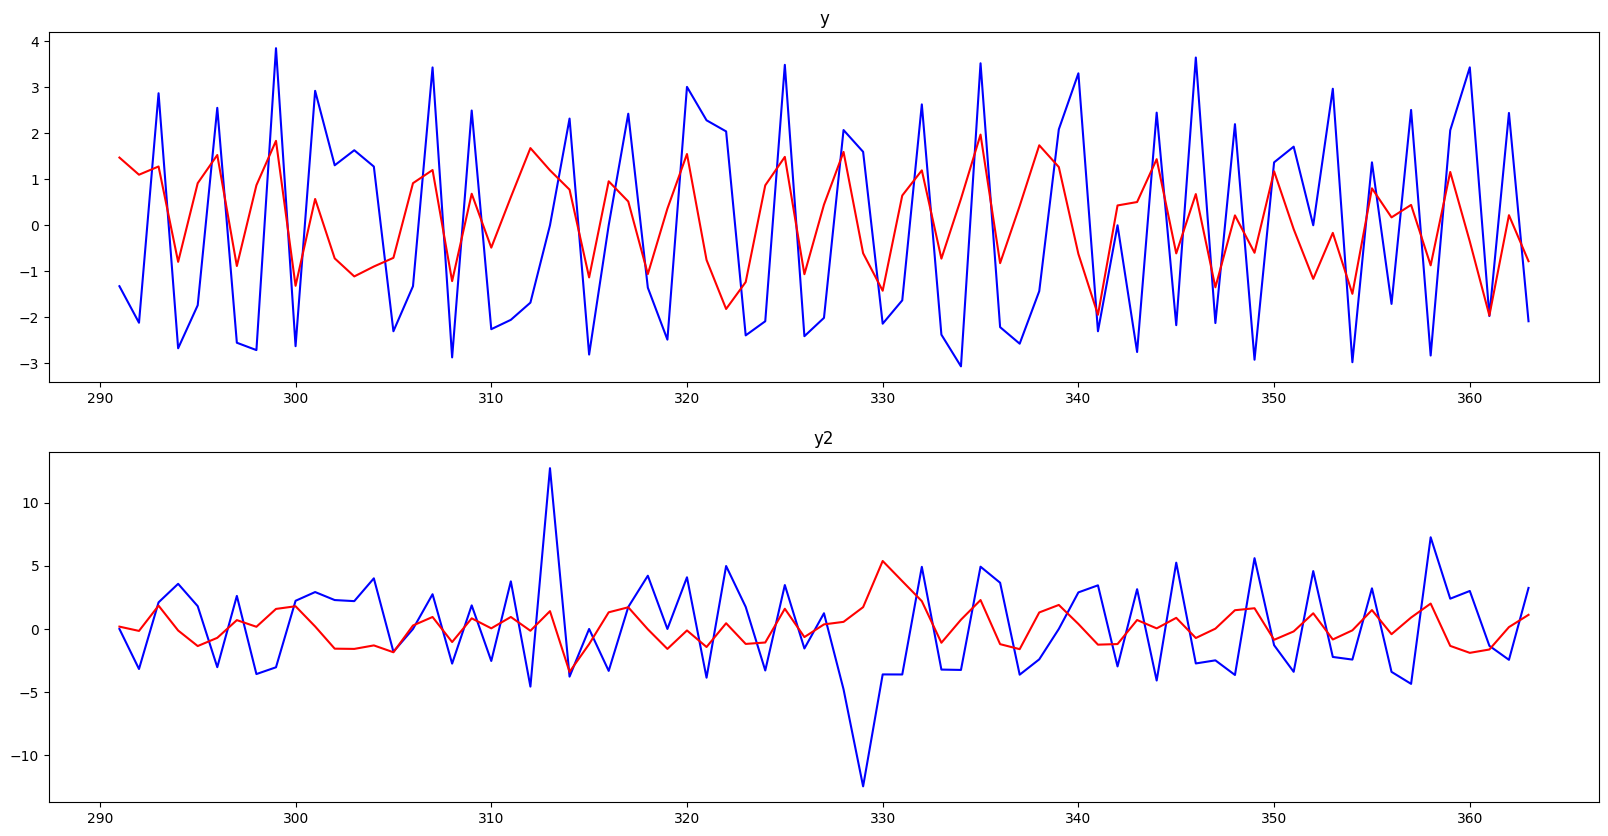

In [128]:
# y corresponding to forecasted values
# diff_df[["y", "y2"]]
y_true = diff_df.iloc[n-n_fcs:n+1, diff_df.columns.get_indexer(["y", "y2"])]

# Let's look at the rmse
print("Test RMSE:",sm.tools.eval_measures.rmse(y_true['y'],fcs['y'],0))

fcs = pd.DataFrame(fcs)
fcs.index = y_true.index
fcs.columns  = y_true.columns

# plot true and forecasted 
fig, axs = plt.subplots(2, 1, figsize=(20,10))
axs[0].plot(y_true['y'],'b-')
axs[0].plot(fcs['y'],'r-')
axs[0].set_title('y')
axs[1].plot(y_true['y2'],'b-')
axs[1].plot(fcs['y2'],'r-')
axs[1].set_title('y2')